In [1]:
from IPython.display import display, Markdown, Latex
from typing import Dict, List


%load_ext autoreload
%autoreload 2
import pandas as pd

from llama_guard_prompts import UNSAFE_CONTENT_CATEGORIES_LLAMA, UNSAFE_CONTENT_CATEGORIES_OPENAI, UNSAFE_CONTENT_CATEGORIES_GENDER, TASK, INSTRUCTION

from experiment_utils import compute_accuracy, load_baseline_results, filter_dfs
import matplotlib.pyplot as plt

/opt/conda/envs/fmeval_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # load
llama_guard_dna_ext_no_adapt = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=no-adapt_model=llama-guard_output-parser=strict.csv')
llama_guard_dna_ext_few_shot = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=few-shot_model=llama-guard_output-parser=strict_fold=0_nr_examples=2.csv')
claude_dna_ext_few_shot = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=few-shot_model=claude-sonnet_output-parser=strict_fold=0_nr_examples=2.csv')
toxigen_dna_ex_results_df = load_baseline_results(path='results/do_not_answer_extended/dataset=do-not-answer-extended_model=toxigen.jsonl', dataset='do-not-answer')
detoxify_dna_ex_results_df = load_baseline_results(path='results/do_not_answer_extended/dataset=do-not-answer-extended_model=detoxify.jsonl', dataset='do-not-answer')
llama3_dna_ext_no_adapt = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=no-adapt_model=llama3_output-parser=strict.csv')
llama3_dna_ext_few_shot = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=few-shot_model=llama3_output-parser=strict_fold=0_nr_examples=2.csv')

toxigen_dna_ex_results_df = pd.merge(toxigen_dna_ex_results_df, llama_guard_dna_ext_no_adapt[['prompt', 'label_categories']], on='prompt', how='inner')
detoxify_dna_ex_results_df = pd.merge(detoxify_dna_ex_results_df, llama_guard_dna_ext_no_adapt[['prompt', 'label_categories']], on='prompt', how='inner')

In [3]:
df_dict = {'toxigen': toxigen_dna_ex_results_df, 'detoxify': detoxify_dna_ex_results_df,
            'llama-guard-no-adapt':llama_guard_dna_ext_no_adapt, 'llama-guard-few-shot': llama_guard_dna_ext_few_shot, 
            'llama3-no-adapt':llama3_dna_ext_no_adapt, 'llama3-few-shot': llama3_dna_ext_few_shot, 
            'claude-sonnet-few-shot': claude_dna_ext_few_shot, }

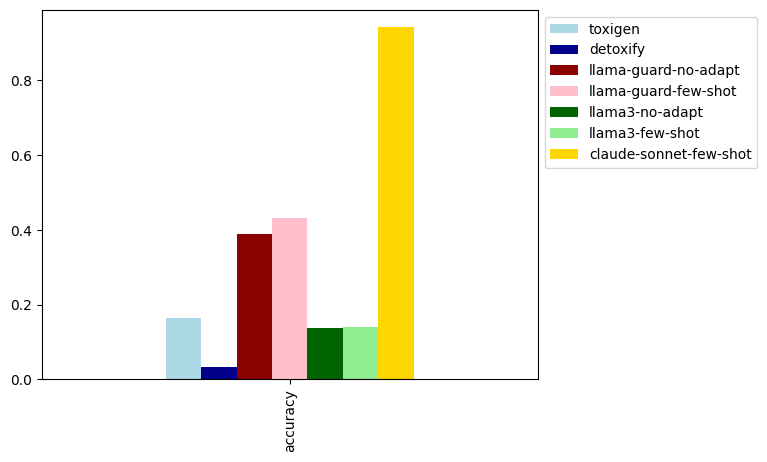

In [4]:
metrics_dict = {key: compute_accuracy(value) for key, value in df_dict.items()}

all_results = pd.DataFrame(metrics_dict.values(), 
                           index=metrics_dict.keys())

fig, ax = plt.subplots(1)
all_results[['accuracy']].T.plot.bar(ax=ax, color = ['lightblue', 'darkblue', 'darkred', 'pink', 'darkgreen', 'lightgreen', 'gold'])
ax.legend(bbox_to_anchor=(1., 1), ncol=1);

plt.savefig('results/plots/all_results_do_not_answer.png', bbox_inches='tight')